## 머신러닝 실습

### 텍스트 마이닝

#### 데이터 수집

##### 네이버 코로나 뉴스로 감성분석

In [1]:
# 필요 라이브러리 사용등록
import json

In [2]:
with open('./data/코로나_naver_news.json', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
import pandas as pd
import re

In [4]:
dfData = pd.DataFrame(data)

In [5]:
dfData.head()

,cnt,description,pDate,title
0,1,"<b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...",2020-06-04 14:12:00,결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;
1,2,▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,2020-06-04 14:12:00,"창녕군, ‘창녕형’비대면 선별진료소 운영"
2,3,"한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...",2020-06-04 14:12:00,"DK모바일, 메인 홍보 모델로 AOA '설현' 선정"
3,4,변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...,2020-06-04 14:12:00,김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]
4,5,이재갑 고용노동부 장관은 6월3일(수) 11시에 <b>코로나</b>19 긴급 고용...,2020-06-04 14:12:00,"이재갑 장관, 고용안정지원금 서울센터 방문"


In [58]:
## 한글 이외의 것 다 제거하는 작업, title/description
dfData['title'] = dfData['title'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [59]:
dfData['description'] = dfData['description'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [60]:
dfData.head()

,cnt,description,pDate,title,title_label,description_label
0,1,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,2020-06-04 14:12:00,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,0,0
1,2,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,2020-06-04 14:12:00,창녕군 창녕형 비대면 선별진료소 운영,0,0
2,3,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,2020-06-04 14:12:00,모바일 메인 홍보 모델로 설현 선정,1,0
3,4,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,2020-06-04 14:12:00,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,0,1
4,5,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,2020-06-04 14:12:00,이재갑 장관 고용안정지원금 서울센터 방문,1,0


In [9]:
dfData[['title', 'pDate', 'description']].to_excel('./data/코로나뉴스_전처리.xlsx', index=False)

In [10]:
dfData.head()

,cnt,description,pDate,title
0,1,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,2020-06-04 14:12:00,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능
1,2,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,2020-06-04 14:12:00,창녕군 창녕형 비대면 선별진료소 운영
2,3,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,2020-06-04 14:12:00,모바일 메인 홍보 모델로 설현 선정
3,4,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,2020-06-04 14:12:00,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰
4,5,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,2020-06-04 14:12:00,이재갑 장관 고용안정지원금 서울센터 방문


##### 감성분석 모델 재구축

In [11]:
## 훈련용 데이터 가져오기
dfNsmcTrain = pd.read_csv('../day12/data/ratings_train.txt', engine='python', sep='\t', encoding='utf-8')

In [12]:
dfNsmcTrain.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [13]:
dfNsmcTrain = dfNsmcTrain[dfNsmcTrain['document'].notnull()]

In [14]:
## 한글이외에 다 제거
dfNsmcTrain['document'] = dfNsmcTrain['document'].apply(lambda x: re.sub(r'[^가-힣|ㄱ-]+', ' ', x))

In [15]:
## 한글 제거 후에 다시 document가 빈 row를 제거
dfNsmcTrain[dfNsmcTrain['document'] != ' ']

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지 소는 뭔죄인가,0
149996,8549745,평점이 너무 낮아서,1
149997,9311800,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,2376369,청춘 영화의 최고봉 방황과 우울했던 날들의 자화상,1


In [16]:
## 베터화 모듈 등록
import konlpy
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [17]:
okt = Okt()

In [18]:
def oktToken(text):
    tokens = okt.morphs(text)
    return tokens

In [19]:
# 벡터화 객체 생성
tfidf = TfidfVectorizer(tokenizer=oktToken, ngram_range=(1, 2), min_df=3, max_df=0.9)

In [20]:
tfidf.fit(dfNsmcTrain['document'])
nsmc_train_tfidf = tfidf.transform(dfNsmcTrain['document'])

c:\DEV\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
nsmc_train_tfidf

<149995x113939 sparse matrix of type '<class 'numpy.float64'>'
	with 2681545 stored elements in Compressed Sparse Row format>

In [22]:
## 로지스틱 회귀 모델 생성
model = LogisticRegression(random_state=0, C=3.5)

In [23]:
model.get_params()

{'C': 3.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
model.fit(nsmc_train_tfidf, dfNsmcTrain['label'])

LogisticRegression(C=3.5, random_state=0)

##### 네이버 뉴스 타이틀로 감성 분석

In [25]:
# 분석할 데이터의 벡터화
data_title_tfisf = tfidf.transform(dfData['title'])

In [26]:
# 감성분석(로지스틱회귀)
title_predict = model.predict(data_title_tfisf)

In [27]:
# 감성분석결과 DF 저장
dfData['title_label'] = title_predict

In [61]:
dfData

,cnt,description,pDate,title,title_label,description_label
0,1,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,2020-06-04 14:12:00,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,0,0
1,2,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,2020-06-04 14:12:00,창녕군 창녕형 비대면 선별진료소 운영,0,0
2,3,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,2020-06-04 14:12:00,모바일 메인 홍보 모델로 설현 선정,1,0
3,4,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,2020-06-04 14:12:00,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,0,1
4,5,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,2020-06-04 14:12:00,이재갑 장관 고용안정지원금 서울센터 방문,1,0
...,...,...,...,...,...,...
795,796,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...,2020-06-04 13:36:00,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,0,0
796,797,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...,2020-06-04 13:36:00,중부발전 소규모 태양광사업자 판매대금 선 지급,1,1
797,798,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...,2020-06-04 13:36:00,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,1,1
798,799,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...,2020-06-04 13:36:00,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,0,1


In [29]:
## 설명도 동일하게 감성분석
data_desc_tfidf = tfidf.transform(dfData['description'])

In [30]:
# 감성분석
dfData['description_label'] = model.predict(data_desc_tfidf)

In [62]:
dfData.tail()

,cnt,description,pDate,title,title_label,description_label
795,796,글로벌기업 현대 기아차가 코로나 의 여파로 해외시장에서 고전을 면치 못하고 있는 가...,2020-06-04 13:36:00,세계의 눈 코로나 영향 현대차 매출 큰 타격 하지만 차량은 순항,0,0
796,797,한국중부발전 본사 전경 한국중부발전 사장 박형구 은 코로나 장기화로 인해 경제적 어...,2020-06-04 13:36:00,중부발전 소규모 태양광사업자 판매대금 선 지급,1,1
797,798,박종환 한국자유총연맹 총재 신종 코로나 바이러스 감염증 코로나 극복과 조기 종식을 ...,2020-06-04 13:36:00,코로나 함께 극복 박종환 자유총연맹 총재 캠페인 참여,1,1
798,799,이상훈 회장은 코로나 신규 확진자가 수도권에서 발생했고 정부는 수도권 한정 사회적 ...,2020-06-04 13:36:00,치과의사 명 모이는 행사 앞두고 치협 회장 행사 취소해달라,0,1
799,800,제 회 대종상영화제 참석한 문가영제 회 대종상영화제 참석한 문가영 코로나 여파로 무...,2020-06-04 13:36:00,포토|대종상영화제 문가영 발랄 듬 뿍,0,0


In [32]:
dfData.to_excel('./data/코로나뉴스_감성분석_결과.xlsx', index=False)

##### 시각화

In [33]:
dfResult = pd.read_excel('./data/코로나뉴스_감성분석_결과.xlsx')

In [34]:
dfResult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cnt                800 non-null    int64 
 1   description        800 non-null    object
 2   pDate              800 non-null    object
 3   title              800 non-null    object
 4   title_label        800 non-null    int64 
 5   description_label  800 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 37.6+ KB


In [35]:
# 타이틀의 감성별 갯수
dfResult['title_label'].value_counts()

title_label
0    469
1    331
Name: count, dtype: int64

In [36]:
# 기사 내용의 감성별 갯수
dfResult['description_label'].value_counts()

description_label
0    449
1    351
Name: count, dtype: int64

In [37]:
## 긍정적 결과와 부정적 결과를 분리
column_names = dfResult.columns.tolist()

In [38]:
column_names.remove('pDate')

In [55]:
column_names

['cnt', 'description', 'title', 'title_label', 'description_label']

In [64]:
# # 빈 DF 생성
# dfPositiveData = pd.DataFrame(columns=column_names)
# dfNegativeData = pd.DataFrame(columns=column_names)

# # description_label이 긍정인지 부정인지에 따라 dfPositiveData와 dfNegativeData에 나눠서 할당
# for i, data in dfData.iterrows():
#     title = data['title']
#     description = data['description']
#     title_label = data['title_label']
#     description_label = data['description_label']
    
#     if description_label == 1:
#         dfTemp = pd.DataFrame([[title, description, title_label, description_label]], columns=dfPositiveData.columns)
#         dfPositiveData = pd.concat([dfPositiveData, dfTemp])
#     else:   # 부정감성 데이터는 여기서 
#         dfTemp = pd.DataFrame([[title, description, title_label, description_label]], columns=dfPositiveData.columns)
#         dfNegativeData = pd.concat([dfNegativeData, dfTemp])

In [72]:
column_names = ['title', 'description', 'title_label', 'description_label']

In [75]:
# 빈 DF 생성
dfPositiveData = pd.DataFrame(columns = column_names)
dfNegativeData = pd.DataFrame(columns = column_names)

# description_label이 긍정인지 부정인지 따라 dfPositiveData와 dfNegativeData에 나눠서 할당
for i , data in dfData.iterrows():
    title = data['title']
    description = data['description']
    title_label = data['title_label']
    description_label = data['description_label']
    
    if description_label == 1: # 긍정감성데이터만 추출
        dfTemp = pd.DataFrame([[title, description, title_label, description_label]], columns=column_names)
        dfPositiveData = pd.concat([dfPositiveData, dfTemp])
    else: #부정감성데이터는 여기서
        dfTemp = pd.DataFrame([[title, description, title_label, description_label]], columns= dfPositiveData.columns)
        dfNegativeData = pd.concat([dfNegativeData, dfTemp])

In [76]:
len(dfPositiveData), len(dfNegativeData)

(351, 449)

#### 시각화

In [77]:
# 긍정 데이터에서 단어 추출
posDescriptions = dfPositiveData['description']

In [78]:
posDescriptionWords = []

for d in posDescriptions:
    posDescriptionWords.append(okt.nouns(d))    # 명사 형태소만 추출

In [79]:
finalPosDescWords = []

for d in posDescriptionWords:
    d2 = [w for w in d if len(w) > 1]   # 글자길이가 1보다 큰것만 추출
    finalPosDescWords.append(' '.join(d2))

In [80]:
finalPosDescWords

['변화 핵심 우리 사회 신종 코로나 바이러스 감염증 코로나 위기 마주 언제 미래 국가 국민 어려움 해결 저희',
 '한편 코로나 해외 재료 사재기 국민 먹거리 안정 생산 포스트 코로나 과제 부각 농민 기본소득 도입 통해 안정 생산 기반 확충',
 '최근 갤러리 현대 창업 주년 기념 작품 전시 코로나 영향 마스크 착용 관람객 미술 트렌드 한국 미술 시장 정태희 서울 옥션 스페셜리스트 세계 경기 침체 코로나 여파',
 '코로나 감안 면접 비대 역량 검사 도입 국내 최대 치킨 프랜차이즈 제너시스 비비큐 회장 채용 관계자 한국 대표 책임감 브랜드 로서 코로나 침체 채용 분위기',
 '오후 서울 중랑구 의료 의료 잠시 콘서트 신종 코로나 바이러스 감염증 코로나 환자 진료 위해 수고 의료 가수 공연 보고 뉴스',
 '플립 러닝 온라인 학습 교실 토론 심화 학습 거꾸로 교실 불리 포스트 코로나 시대 교육 방식 주목 아르고 리더십 상황 게임 통해 리더십 유형',
 '코로나 사태 가운데 병영 생활 손흥민 경험 영국 화제 손흥민 서로 금방 이서 정말 서로 호흡',
 '청와대 해외 보가 문재인 대통령 포스트 코로나 시대 경제위기 정상회담 통해 양국 협력 에너지 의료 확장 최근 카타르 코로나 관련',
 '맥도날드 코로나 방역 작업 대구 지하철 청소 근로자 빅맥 커피 증정 패션 업계 나눔 활동 동참 코오롱 인더스 트리 직원 성과 상금 만원 코로나 어려움',
 '정하영 김포시 혁신 교육 지구 사업 특수교육 대상자 사업 별도 편성 소외 학생 면서 코로나 교육과정 운영 판단 학생 안전 방역',
 '군포 시청 서울시 리치 웨이 코로나 진자 동선 공개 군포로 번길 거주 자료 군포 시청 군포 시청 서울시 리치 웨이 코로나 진자 동선 공개 군포 시청 공식 블로그 통해 서울시',
 '명품 함양 양파 특판전 모습 사진 제공 함양군 함양군 롯데 마트 서울 역점 양파 소비 촉진 판촉 행사 코로나 농심 위로 함양군 코로나 장기 소비 위축 판매 어려움',
 '지난 방송 세기 힛트송 노래방 대리 만족 구석

In [81]:
## TF-IDF 기반 단어별 출현빈도 계산
posTfidf = TfidfVectorizer(tokenizer=oktToken, min_df=2)

In [82]:
posDtm = posTfidf.fit_transform(finalPosDescWords)

c:\DEV\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [83]:
posTfidf.get_feature_names_out()

array(['가', '가격', '가구', '가능성', '가량', '가속', '가수', '가운데', '가장', '가지', '각종',
       '각지', '간소화', '간식', '갈등', '감사', '감상', '감성', '감소', '감염', '감염병',
       '감염증', '강의', '강제', '강조', '개발', '개방', '개선', '개월', '개인', '개척', '개최',
       '개학', '거래', '거리', '거주', '걱정', '건강', '검사', '검역', '게임', '격려', '격리',
       '결과', '결정', '결합', '경관', '경기', '경기도', '경로', '경북', '경영', '경우', '경제',
       '경제위기', '경주시', '경험', '계기', '계속', '계약', '계층', '계획', '고객', '고등학교',
       '고용', '고조', '공간', '공감', '공개', '공공시설', '공급', '공무원', '공사', '공식',
       '공연', '공유', '공익', '공인', '공적', '과장', '과정', '과학기술', '곽상욱', '관객',
       '관계자', '관광', '관내', '관람', '관련', '관리', '관심', '관악구', '광고', '광주', '교육',
       '교육감', '교육과정', '교육과정평가원', '교육비', '교육지원청', '교육청', '교회', '구급', '구독',
       '구입', '구직', '구축', '구현', '국가', '국난', '국내', '국내외', '국무회의', '국민',
       '국제', '국회', '군민', '군수', '군포시', '규모', '규제', '그간', '그동안', '그룹', '그린',
       '극복', '극장', '근로자', '글래스', '글로벌', '금리', '금번', '금융', '금은', '급변',
       '급증', '기간', '기관', '기념', '기록', '기리', '기미', '기반', '기본',

In [84]:
posVocas = dict()

for i, word in enumerate(posTfidf.get_feature_names_out()):
    posVocas[word] = posDtm.getcol(i).sum() # 해당 단어의 빈도수

In [85]:
# 빈도수가 높은 것부터 정렬(내림차순 정렬)
posWords = sorted(posVocas.items(), key=(lambda x: x[1]), reverse=True)

In [86]:
posWords

[('코로나', 28.495339934790294),
 ('의료', 13.189719222690671),
 ('위해', 10.978082602546433),
 ('바이러스', 9.372985966706924),
 ('신종', 8.930569172471085),
 ('감염증', 8.833175488837927),
 ('온라인', 7.810634479002064),
 ('시대', 7.504012728927098),
 ('사회', 7.067897689998734),
 ('이번', 7.066523016159934),
 ('확산', 6.926597018699743),
 ('통해', 6.501064027362628),
 ('지역', 6.437826085897294),
 ('극복', 6.1749583827180405),
 ('어려움', 6.096041813422605),
 ('포스트', 5.934353442169918),
 ('기업', 5.4404727925878635),
 ('사태', 5.349858535501614),
 ('언택트', 5.154419545078235),
 ('최근', 5.090716500449664),
 ('환자', 5.088952833078169),
 ('서울', 5.057806550194296),
 ('상황', 5.0344108951407485),
 ('대표', 4.9190897546948005),
 ('공연', 4.892953216105479),
 ('우리', 4.86947821185112),
 ('올해', 4.853456731679325),
 ('정부', 4.815455051492627),
 ('한국', 4.810622169987172),
 ('비대', 4.809599252742366),
 ('개발', 4.764189922915747),
 ('경제', 4.76215381851711),
 ('사업', 4.735778768951658),
 ('방역', 4.698113606515298),
 ('생활', 4.589218222257065),
 ('시장',

In [87]:
## 차트 라이브러리 등록
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
sns.set_style('darkgrid')

In [89]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용, 나눔고딕에서 오류발생(!)
font = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결!

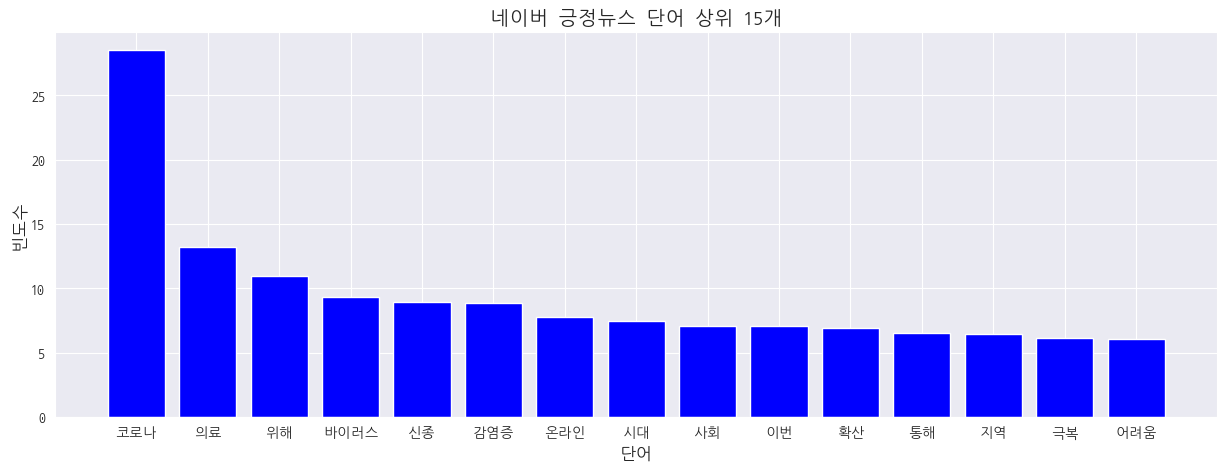

In [90]:
max = 15
plt.figure(figsize=(15, 5))
plt.bar(range(max), [i[1] for i in posWords[:max]], color='blue')
plt.title('네이버 긍정뉴스 단어 상위 15개', fontsize=14)
plt.xlabel('단어', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
# x축 단어 표시
plt.xticks(range(max), [i [0] for i in posWords[:max]], rotation=0)

plt.show()